In [35]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import itertools

In [89]:
def get_approaches_results(datasets, column_mean, column_std, group_by_th = False, items_num = 1000):
    mean = []
    std = []
    #initial
    if group_by_th == True:
        ths = datasets[0]["threshold"]
        for th in ths:
            for data in datasets:
                data = data[data["threshold"]==th]
                if(column_mean == 'cost'):
                    vals = data[column_mean]/data['cost_ratio'][0]/items_num
                    for v in vals:
                        mean.append(v)
                    vals_std = data[column_std]/data['cost_ratio'][0]/items_num
                    for s in vals_std:
                        std.append(s)
                else:
                    vals = data[column_mean]
                    for v in vals:
                        mean.append(v)
                    vals_std = data[column_std]
                    for s in vals_std:
                        std.append(s)
    else:
        for data in datasets:
            if(column_mean == 'cost'):
                vals = data[column_mean]/data['cost_ratio']/items_num
                for v in vals:
                    mean.append(v)
                vals_std = data[column_std]/data['cost_ratio']/items_num
                for s in vals_std:
                    std.append(s)
            else:
                vals = data[column_mean]
                for v in vals:
                    mean.append(v)
                vals_std = data[column_std]
                for s in vals_std:
                    std.append(s)
        
    return mean, std

def get_group_colors(groups, subgroups):
    #colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'white']
    return np.concatenate([[np.concatenate(np.random.rand(3,1))] * subgroups for x in range(groups)])

def concatenate(list1, list2):
    result = []
    for elem1 in list1:
        result.append(elem1)
        
    for elem2 in list2:
        result.append(elem2)
        
    return result

def get_total_results(list1, list2, column, mv_num=None, cost_ratio=None, decision_fn=None, threshold=None, class_fn=None, c=None, e=None):
    if mv_num != None:
        return concatenate(list1[list1['votes']==mv_num][column].values, 
                           list2[list2['votes']==mv_num][column].values)
    elif c != None:
        return concatenate(list1[list1['c']==c][list1['e']==e][column].values, 
                           list2[list2['c']==c][list2['e']==e][column].values)
    elif class_fn != None:
        return concatenate(list1[list1['class_fn']==class_fn][list1['decision_fn']==decision_fn][list1['cost_ratio']==cost_ratio][list1['threshold']==threshold][column].values, 
                           list2[list2['class_fn']==class_fn][list2['decision_fn']==decision_fn][list2['cost_ratio']==cost_ratio][list2['threshold']==threshold][column].values)
    elif decision_fn != None:
        return concatenate(list1[list1['decision_fn']==decision_fn][list1['cost_ratio']==cost_ratio][list1['threshold']==threshold][column].values, 
                           list2[list2['decision_fn']==decision_fn][list2['cost_ratio']==cost_ratio][list2['threshold']==threshold][column].values)
    else:
        return concatenate(list1[column].values, 
                           list2[column].values)

## MV Fixed votes

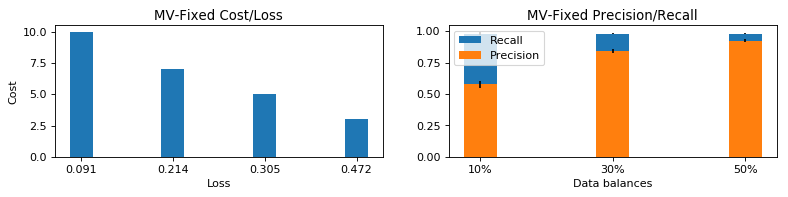

In [223]:
#smv_05 = pd.read_csv('./results/mv/simulated/it50_d50_b5_lr5/smart_stop_mv_not_expert_it50_d50_b5_cr05.csv')
data = pd.read_csv('./results/simulated_dataset/all_combinations_results_mv.csv')



plt.figure(num=1, figsize=(18, 10), dpi=80, facecolor='w', edgecolor='k')
plt.tight_layout()
width = 0.05       # the width of the bars: can also be len(x) sequence

cost_mean = smv_05["cost"]/smv_05["cost_ratio"]/1000
cost_std = smv_05["cost_std"]/smv_05["cost_ratio"]/1000

plt.subplot(431)
ind = [.2, .4, .6, .8]
#balanced dataset, diff #votes
smv_05 = data[data['class_fn']=='majority_voting'][data['data_bal']==0.5][data['cost_ratio']==0.05].iloc[::-1]
p1 = plt.bar(ind, cost_mean, width, yerr=cost_std)
loss_mean = smv_05["loss"]
loss_std = smv_05["loss_std"]
plt.title('MV-Fixed Cost/Loss')
plt.ylabel("Cost")
plt.xlabel("Loss")
plt.xticks(ind, [round(x, 3) for x in smv_05['loss']])

#data balance
smv_05 = data[data['class_fn']=='majority_voting'][data['votes']==10][data['cost_ratio']==0.05]
plt.subplot(432)
ind = [.5, .3, .1]
precision_mean = smv_05["precision"]
precision_std = smv_05["precision_std"]
recall_mean = smv_05["recall"]
recall_std = smv_05["recall_std"]
p1 = plt.bar(ind, recall_mean, width, yerr=recall_std)
p2 = plt.bar(ind, precision_mean, width, yerr=precision_std)
plt.title('MV-Fixed Precision/Recall')
#plt.ylabel("Cost")
plt.xlabel("Data balances")
plt.legend((p1[0], p2[1]), ('Recall', 'Precision'))
plt.xticks(ind, ['50%', '30%', '10%'])


plt.show()

## Comparison fixed-adaptive

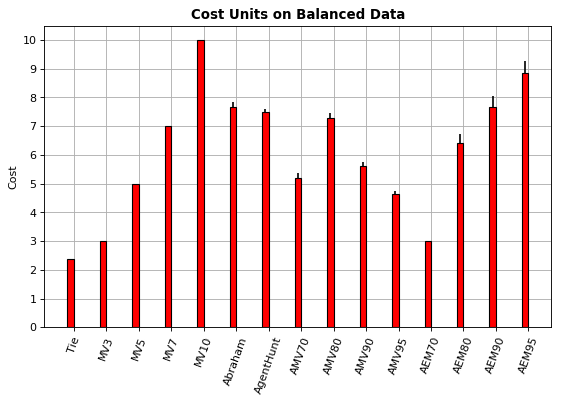

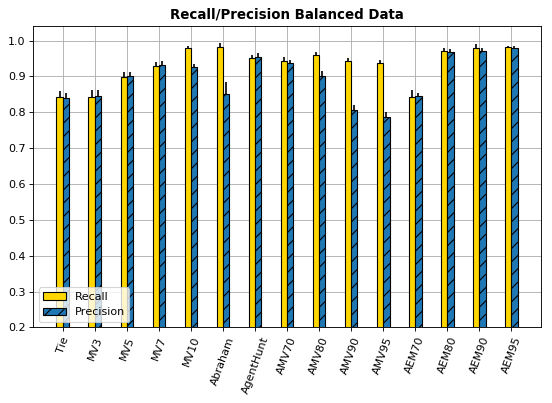

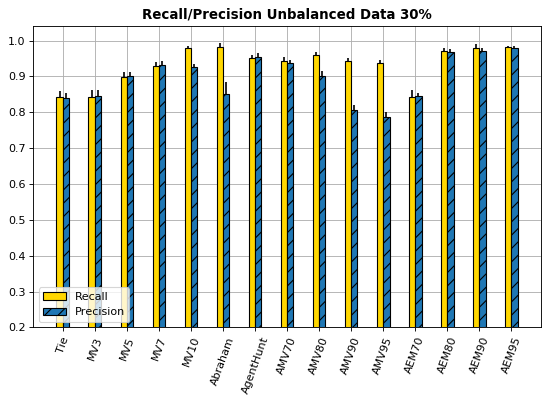

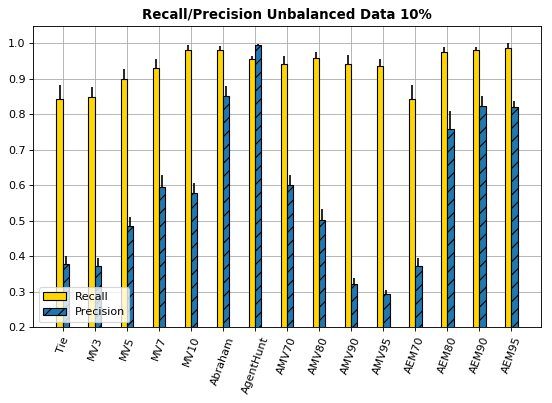

In [18]:
from IPython.core import display as ICD

data_mv = pd.read_csv('./results/simulated_dataset/all_combinations_results_mv.csv')
data_tie = pd.read_csv('./results/simulated_dataset/all_combinations_results_break_tie.csv')
data_abraham = pd.read_csv('./results/abraham/results_cs_es_varied.csv')
data_agenthunt = pd.read_csv('./results/agenthunt/simulated_datasets_results.csv')
adaptive = pd.read_csv('./results/simulated_dataset/all_combinations_results_adaptive.csv')

abraham_c = 2
abraham_e = 0.2


cr = 0.05

data_bal = 0.5
mv = data_mv[data_mv['data_bal']==data_bal]
tie = data_tie[data_tie['data_bal']==data_bal]
abraham = data_abraham[data_abraham['data_bal']==data_bal][data_abraham['c']==abraham_c][data_abraham['e']==abraham_e]
agenthunt = data_agenthunt[data_agenthunt['data_bal']==data_bal]
adaptive_mv = adaptive[adaptive['class_fn']=='majority_voting'][adaptive['decision_fn']=='decision_function_mv'] \
[adaptive['data_bal']==data_bal][adaptive['cost_ratio']==0.05]
adaptive_bayes = adaptive[adaptive['class_fn']=='majority_voting'][adaptive['decision_fn']=='decision_function_bayes'] \
[adaptive['data_bal']==data_bal][adaptive['cost_ratio']==0.05]

datasets_print = [tie, mv, abraham, agenthunt, adaptive_mv, adaptive_bayes]

items = 15
ind = np.arange(items)
width = .2
xticks_ind = ind + width / 2
xticks_rotation = 70
xticks_names = ('Tie', 'MV3', 'MV5', 'MV7', 'MV10', 'Abraham', 'AgentHunt', 'AMV70', 'AMV80', 'AMV90', 'AMV95', 'AEM70', 'AEM80', 'AEM90', 'AEM95')


#Figure 1
plt.figure(num=1, figsize=(18, 10), dpi=80, facecolor='w', edgecolor='k')
plt.subplots_adjust(bottom = .05)

#Balanced dataset
#1)
plt.subplot(221)
cost_mean, cost_std = get_approaches_results(datasets_print, "cost", "cost_std")

p1 = plt.bar(ind, cost_mean, width, yerr=cost_std, zorder=3, color='red', edgecolor='black')
plt.ylabel('Cost')
plt.title('Cost Units on Balanced Data', fontweight="bold")
plt.xticks(xticks_ind, xticks_names, rotation=xticks_rotation)
plt.grid(zorder=0)
plt.yticks(np.arange(0,11,1))
plt.savefig("./charts/balanced_data_cost", bbox_inches = 'tight', pad_inches = 0)
plt.show()

#2)
plt.figure(num=2, figsize=(18, 10), dpi=80, facecolor='w', edgecolor='k')
plt.subplots_adjust(bottom = .05)
plt.subplot(221)
precision_mean, precision_std = get_approaches_results(datasets_print, "precision", "precision_std")
recall_mean, recall_std = get_approaches_results(datasets_print, "recall", "recall_std")
p1 = plt.bar(ind, recall_mean, width, yerr=recall_std, zorder=3, color='gold', edgecolor='black')
p2 = plt.bar(ind+width, precision_mean, width, yerr=precision_std, zorder=3, edgecolor='black', hatch="//")
plt.legend((p1[0], p2[1]), ('Recall', 'Precision'), loc=3)
plt.title('Recall/Precision Balanced Data', fontweight="bold")
plt.xticks(xticks_ind, xticks_names, rotation=xticks_rotation)
plt.grid(zorder=0)
plt.yticks(np.arange(0,1.01,.1))
plt.gca().set_ylim(bottom=0.2)
plt.savefig("./charts/balanced_data_quality", bbox_inches = 'tight', pad_inches = 0)
plt.show()


#unbalanced plots
#Unbalanced datasets 30%
#3)
plt.figure(num=3, figsize=(18, 10), dpi=80, facecolor='w', edgecolor='k')
plt.subplots_adjust(bottom = .05)

data_bal = 0.3
mv = data_mv[data_mv['data_bal']==data_bal]
tie = data_tie[data_tie['data_bal']==data_bal]
abraham = data_abraham[data_abraham['data_bal']==data_bal][data_abraham['c']==abraham_c][data_abraham['e']==abraham_e]
agenthunt = data_agenthunt[data_agenthunt['data_bal']==data_bal]
adaptive_mv = adaptive[adaptive['class_fn']=='majority_voting'][adaptive['decision_fn']=='decision_function_mv'] \
[adaptive['data_bal']==data_bal][adaptive['cost_ratio']==0.05]
adaptive_bayes = adaptive[adaptive['class_fn']=='majority_voting'][adaptive['decision_fn']=='decision_function_bayes'] \
[adaptive['data_bal']==data_bal][adaptive['cost_ratio']==0.05]

plt.subplot(221)
precision_mean, precision_std = get_approaches_results(datasets_print, "precision", "precision_std")
recall_mean, recall_std = get_approaches_results(datasets_print, "recall", "recall_std")
p1 = plt.bar(ind, recall_mean, width, yerr=recall_std, zorder=3, color='gold', edgecolor='black')
p2 = plt.bar(ind+width, precision_mean, width, yerr=precision_std, zorder=3, edgecolor='black', hatch="//")
plt.legend((p1[0], p2[1]), ('Recall', 'Precision'), loc=3)
plt.title('Recall/Precision Unbalanced Data 30%', fontweight="bold")
plt.xticks(xticks_ind, xticks_names, rotation=xticks_rotation)
plt.grid(zorder=0)
plt.yticks(np.arange(0,1.01,.1))
plt.gca().set_ylim(bottom=0.2)
plt.savefig("./charts/unbalanced_data_30_quality", bbox_inches = 'tight', pad_inches = 0)
plt.show()

#Unbalanced datasets 10%
#4)
plt.figure(num=4, figsize=(18, 10), dpi=80, facecolor='w', edgecolor='k')
plt.subplots_adjust(bottom = .05)

data_bal = 0.1
mv = data_mv[data_mv['data_bal']==data_bal]
tie = data_tie[data_tie['data_bal']==data_bal]
abraham = data_abraham[data_abraham['data_bal']==data_bal][data_abraham['c']==abraham_c][data_abraham['e']==abraham_e]
agenthunt = data_agenthunt[data_agenthunt['data_bal']==data_bal]
adaptive_mv = adaptive[adaptive['class_fn']=='majority_voting'][adaptive['decision_fn']=='decision_function_mv'] \
[adaptive['data_bal']==data_bal][adaptive['cost_ratio']==0.05]
adaptive_bayes = adaptive[adaptive['class_fn']=='majority_voting'][adaptive['decision_fn']=='decision_function_bayes'] \
[adaptive['data_bal']==data_bal][adaptive['cost_ratio']==0.05]

datasets_print = [tie, mv, abraham, agenthunt, adaptive_mv, adaptive_bayes]

plt.subplot(221)
precision_mean, precision_std = get_approaches_results(datasets_print, "precision", "precision_std")
recall_mean, recall_std = get_approaches_results(datasets_print, "recall", "recall_std")
p1 = plt.bar(ind, recall_mean, width, yerr=recall_std, zorder=3, color='gold', edgecolor='black')
p2 = plt.bar(ind+width, precision_mean, width, yerr=precision_std, zorder=3, edgecolor='black', hatch="//")
plt.legend((p1[0], p2[1]), ('Recall', 'Precision'), loc=3)
plt.title('Recall/Precision Unbalanced Data 10%', fontweight="bold")
plt.xticks(xticks_ind, xticks_names, rotation=xticks_rotation)
plt.grid(zorder=0)
plt.yticks(np.arange(0,1.01,.1))
plt.gca().set_ylim(bottom=0.2)
plt.savefig("./charts/unbalanced_data_10_quality", bbox_inches = 'tight', pad_inches = 0)
plt.show()

# Cost impact .2 (1:5) vs .1 (1:10) vs .05 (1:20)

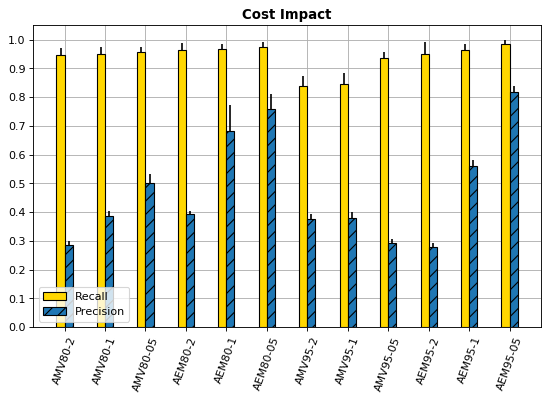

In [421]:
adaptive = pd.read_csv('./results/simulated_dataset/all_combinations_results_adaptive.csv')

data_bal = 0.1

ths = [0.8, 0.95]

adaptive_mv_5 = adaptive[adaptive['class_fn']=='majority_voting'][adaptive['decision_fn']=='decision_function_mv'] \
[adaptive['data_bal']==data_bal][adaptive['cost_ratio']==0.2][adaptive['threshold'].isin(ths)]
adaptive_bayes_5 = adaptive[adaptive['class_fn']=='majority_voting'][adaptive['decision_fn']=='decision_function_bayes'] \
[adaptive['data_bal']==data_bal][adaptive['cost_ratio']==0.2][adaptive['threshold'].isin(ths)]

adaptive_mv_10 = adaptive[adaptive['class_fn']=='majority_voting'][adaptive['decision_fn']=='decision_function_mv'] \
[adaptive['data_bal']==data_bal][adaptive['cost_ratio']==0.1][adaptive['threshold'].isin(ths)]
adaptive_bayes_10 = adaptive[adaptive['class_fn']=='majority_voting'][adaptive['decision_fn']=='decision_function_bayes'] \
[adaptive['data_bal']==data_bal][adaptive['cost_ratio']==0.1][adaptive['threshold'].isin(ths)]

adaptive_mv_20 = adaptive[adaptive['class_fn']=='majority_voting'][adaptive['decision_fn']=='decision_function_mv'] \
[adaptive['data_bal']==data_bal][adaptive['cost_ratio']==0.05][adaptive['threshold'].isin(ths)]
adaptive_bayes_20 = adaptive[adaptive['class_fn']=='majority_voting'][adaptive['decision_fn']=='decision_function_bayes'] \
[adaptive['data_bal']==data_bal][adaptive['cost_ratio']==0.05][adaptive['threshold'].isin(ths)]

datasets_print = [adaptive_mv_5, adaptive_mv_10, adaptive_mv_20, adaptive_bayes_5, adaptive_bayes_10, adaptive_bayes_20]

items = 12
ind = np.arange(items)
width = .2
xticks_ind = ind + width / 2
xticks_rotation = 70
xticks_names = (
                #'AMV70-2', 'AMV70-1', 'AMV70-05', \
                #'AEM70-2', 'AEM70-1', 'AEM70-05', \
                'AMV80-2', 'AMV80-1', 'AMV80-05', \
                'AEM80-2', 'AEM80-1', 'AEM80-05', \
                #'AMV90-2', 'AMV90-1', 'AMV90-05', \
                #'AEM90-2','AEM90-1', 'AEM90-05', \
                'AMV95-2','AMV95-1', 'AMV95-05', \
                'AEM95-2','AEM95-1', 'AEM95-05')
                   

plt.figure(num=7, figsize=(18, 10), dpi=80, facecolor='w', edgecolor='k')
plt.subplots_adjust(bottom = .05)
plt.subplot(221)
plt.grid(zorder=0)
precision_mean, precision_std = get_approaches_results(datasets_print, "precision", "precision_std", True)
recall_mean, recall_std = get_approaches_results(datasets_print, "recall", "recall_std", True)
p1 = plt.bar(ind, recall_mean, width, yerr=recall_std, zorder=3, color='gold', edgecolor='black')
p2 = plt.bar(ind+width, precision_mean, width, zorder=3, yerr=precision_std, edgecolor='black', hatch="//")
plt.legend((p1[0], p2[1]), ('Recall', 'Precision'), loc=3)
plt.title("Cost Impact", fontweight="bold")
plt.xticks(xticks_ind, xticks_names, rotation=xticks_rotation)
plt.yticks(np.arange(0,1.1,.1))
plt.savefig("./charts/cost_impact", bbox_inches = 'tight', pad_inches = 0)



plt.show()

## Loss

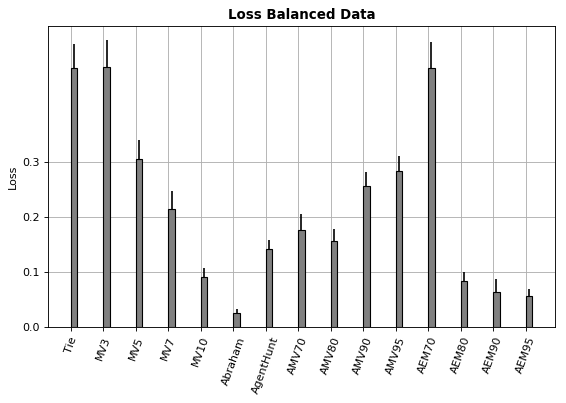

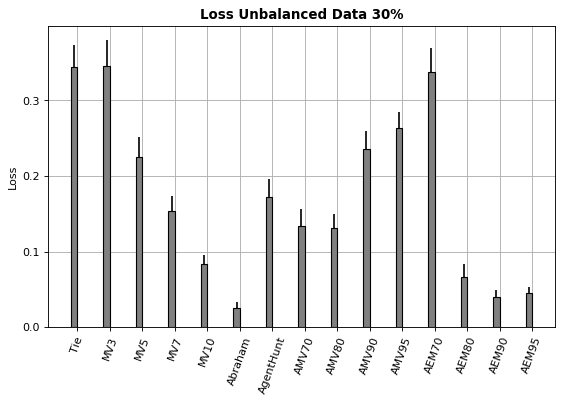

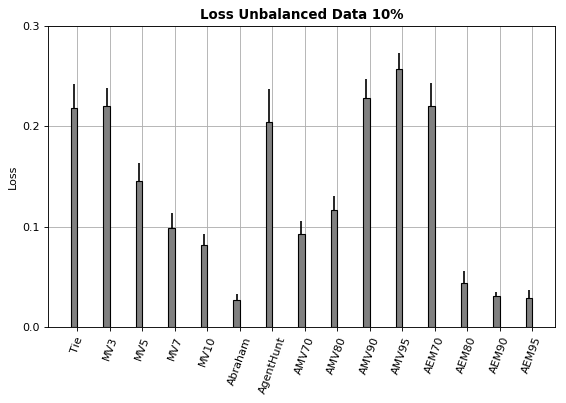

In [11]:
from IPython.core import display as ICD

data_mv = pd.read_csv('./results/simulated_dataset/all_combinations_results_mv.csv')
data_tie = pd.read_csv('./results/simulated_dataset/all_combinations_results_break_tie.csv')
data_abraham = pd.read_csv('./results/abraham/results_cs_es_varied.csv')
data_agenthunt = pd.read_csv('./results/agenthunt/simulated_datasets_results.csv')
adaptive = pd.read_csv('./results/simulated_dataset/all_combinations_results_adaptive.csv')

abraham_c = 2
abraham_e = 0.2

items = 15
ind = np.arange(items)
width = .2
xticks_ind = ind + width / 2
xticks_rotation = 70
xticks_names = ('Tie', 'MV3', 'MV5', 'MV7', 'MV10', 'Abraham', 'AgentHunt', 'AMV70', 'AMV80', 'AMV90', 'AMV95', 'AEM70', 'AEM80', 'AEM90', 'AEM95')


#Figure 1
data_bal = 0.5
mv = data_mv[data_mv['data_bal']==data_bal]
tie = data_tie[data_tie['data_bal']==data_bal]
abraham = data_abraham[data_abraham['data_bal']==data_bal][data_abraham['c']==abraham_c][data_abraham['e']==abraham_e]
agenthunt = data_agenthunt[data_agenthunt['data_bal']==data_bal]
adaptive_mv = adaptive[adaptive['class_fn']=='majority_voting'][adaptive['decision_fn']=='decision_function_mv'] \
[adaptive['data_bal']==data_bal][adaptive['cost_ratio']==0.05]
adaptive_bayes = adaptive[adaptive['class_fn']=='majority_voting'][adaptive['decision_fn']=='decision_function_bayes'] \
[adaptive['data_bal']==data_bal][adaptive['cost_ratio']==0.05]

#plot
datasets_print = [tie, mv, abraham, agenthunt, adaptive_mv, adaptive_bayes]


#2)
plt.figure(num=2, figsize=(18, 10), dpi=80, facecolor='w', edgecolor='k')
plt.subplots_adjust(bottom = .05)
plt.subplot(221)
loss_mean, loss_std = get_approaches_results(datasets_print, "loss", "loss_std")
p2 = plt.bar(ind+width, loss_mean, width, yerr=loss_std, zorder=3, edgecolor='black', color='grey')
plt.title('Loss Balanced Data', fontweight="bold")
plt.xticks(xticks_ind, xticks_names, rotation=xticks_rotation)
plt.ylabel('Loss')
plt.grid(zorder=0)
plt.yticks(np.arange(0, .4,.1))
plt.savefig("./charts/loss_balanced", bbox_inches = 'tight', pad_inches = 0)
plt.show()


#unbalanced plots
#Unbalanced datasets 30%
#3)
plt.figure(num=3, figsize=(18, 10), dpi=80, facecolor='w', edgecolor='k')
plt.subplots_adjust(bottom = .05)
data_bal = 0.3
mv = data_mv[data_mv['data_bal']==data_bal]
tie = data_tie[data_tie['data_bal']==data_bal]
abraham = data_abraham[data_abraham['data_bal']==data_bal][data_abraham['c']==abraham_c][data_abraham['e']==abraham_e]
agenthunt = data_agenthunt[data_agenthunt['data_bal']==data_bal]
adaptive_mv = adaptive[adaptive['class_fn']=='majority_voting'][adaptive['decision_fn']=='decision_function_mv'] \
[adaptive['data_bal']==data_bal][adaptive['cost_ratio']==0.05]
adaptive_bayes = adaptive[adaptive['class_fn']=='majority_voting'][adaptive['decision_fn']=='decision_function_bayes'] \
[adaptive['data_bal']==data_bal][adaptive['cost_ratio']==0.05]
datasets_print = [tie, mv, abraham, agenthunt, adaptive_mv, adaptive_bayes]

plt.subplot(221)
loss_mean, loss_std = get_approaches_results(datasets_print, "loss", "loss_std")
p1 = plt.bar(ind, loss_mean, width, yerr=loss_std, zorder=3, color='grey', edgecolor='black')
plt.ylabel('Loss')
plt.title('Loss Unbalanced Data 30%', fontweight="bold")
plt.xticks(xticks_ind, xticks_names, rotation=xticks_rotation)
plt.grid(zorder=0)
plt.yticks(np.arange(0, .4,.1))
plt.savefig("./charts/loss_unbalanced_30", bbox_inches = 'tight', pad_inches = 0)
plt.show()

#Unbalanced datasets 10%
#4)
plt.figure(num=4, figsize=(18, 10), dpi=80, facecolor='w', edgecolor='k')
plt.subplots_adjust(bottom = .05)
data_bal = 0.1
mv = data_mv[data_mv['data_bal']==data_bal]
tie = data_tie[data_tie['data_bal']==data_bal]
abraham = data_abraham[data_abraham['data_bal']==data_bal][data_abraham['c']==abraham_c][data_abraham['e']==abraham_e]
agenthunt = data_agenthunt[data_agenthunt['data_bal']==data_bal]
adaptive_mv = adaptive[adaptive['class_fn']=='majority_voting'][adaptive['decision_fn']=='decision_function_mv'] \
[adaptive['data_bal']==data_bal][adaptive['cost_ratio']==0.05]
adaptive_bayes = adaptive[adaptive['class_fn']=='majority_voting'][adaptive['decision_fn']=='decision_function_bayes'] \
[adaptive['data_bal']==data_bal][adaptive['cost_ratio']==0.05]
datasets_print = [tie, mv, abraham, agenthunt, adaptive_mv, adaptive_bayes]

plt.subplot(221)
loss_mean, loss_std = get_approaches_results(datasets_print, "loss", "loss_std")
p1 = plt.bar(ind, loss_mean, width, yerr=loss_std, zorder=3, color='grey', edgecolor='black')
plt.ylabel('Loss')
plt.title('Loss Unbalanced Data 10%', fontweight="bold")
plt.xticks(xticks_ind, xticks_names, rotation=xticks_rotation)
plt.grid(zorder=0)
plt.yticks(np.arange(0, .4,.1))

plt.savefig("./charts/loss_unbalanced_10", bbox_inches = 'tight', pad_inches = 0)
plt.show()

## Adaptative MV over ths and crs

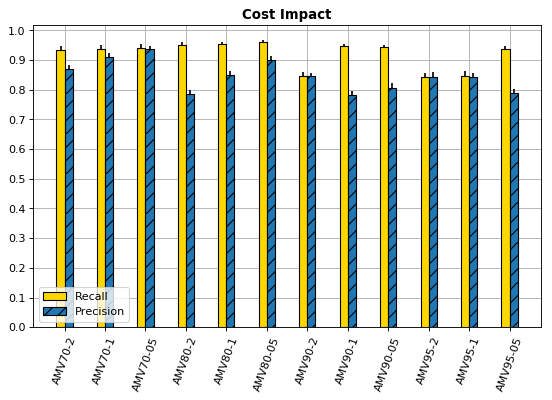

In [433]:
adaptive = pd.read_csv('./results/simulated_dataset/all_combinations_results_adaptive.csv')

data_bal = 0.5

#ths = [0.8, 0.95]

adaptive_mv_5 = adaptive[adaptive['class_fn']=='majority_voting'][adaptive['decision_fn']=='decision_function_mv'] \
[adaptive['data_bal']==data_bal][adaptive['cost_ratio']==0.2]#[adaptive['threshold'].isin(ths)]
adaptive_mv_10 = adaptive[adaptive['class_fn']=='majority_voting'][adaptive['decision_fn']=='decision_function_mv'] \
[adaptive['data_bal']==data_bal][adaptive['cost_ratio']==0.1]#[adaptive['threshold'].isin(ths)]
adaptive_mv_20 = adaptive[adaptive['class_fn']=='majority_voting'][adaptive['decision_fn']=='decision_function_mv'] \
[adaptive['data_bal']==data_bal][adaptive['cost_ratio']==0.05]#[adaptive['threshold'].isin(ths)]

datasets_print = [adaptive_mv_5, adaptive_mv_10, adaptive_mv_20]

items = 12
ind = np.arange(items)
width = .2
xticks_ind = ind + width / 2
xticks_rotation = 70
xticks_names = ('AMV70-2', 'AMV70-1', 'AMV70-05', \
                'AMV80-2', 'AMV80-1', 'AMV80-05', \
                'AMV90-2', 'AMV90-1', 'AMV90-05', \
                'AMV95-2','AMV95-1', 'AMV95-05')
                   

plt.figure(num=7, figsize=(18, 10), dpi=80, facecolor='w', edgecolor='k')
plt.subplots_adjust(bottom = .05)
plt.subplot(221)
plt.grid(zorder=0)
precision_mean, precision_std = get_approaches_results(datasets_print, "precision", "precision_std", True)
recall_mean, recall_std = get_approaches_results(datasets_print, "recall", "recall_std", True)
p1 = plt.bar(ind, recall_mean, width, yerr=recall_std, zorder=3, color='gold', edgecolor='black')
p2 = plt.bar(ind+width, precision_mean, width, zorder=3, yerr=precision_std, edgecolor='black', hatch="//")
plt.legend((p1[0], p2[1]), ('Recall', 'Precision'), loc=3)
plt.title("Cost Impact", fontweight="bold")
plt.xticks(xticks_ind, xticks_names, rotation=xticks_rotation)
plt.yticks(np.arange(0,1.1,.1))
#plt.savefig("./charts/cost_impact", bbox_inches = 'tight', pad_inches = 0)



plt.show()

## Real world datasets

- Database: BarzanMozafari - Items: 1000 - Workers: 83 - Workers Accuracy Avg: 68.91
- Database: RTE - Items: 800 - Workers: 164 - Workers Accuracy Avg: 83.7
- Database: SpamCF - Items: 101 - Workers: 150 - Workers Accuracy Avg: 69.07
- Database: TEMP - Items: 462 - Workers: 76 - Workers Accuracy Avg: 84.13
- Database: WVSCM - Items: 160 - Workers: 17 - Workers Accuracy Avg: 65.77

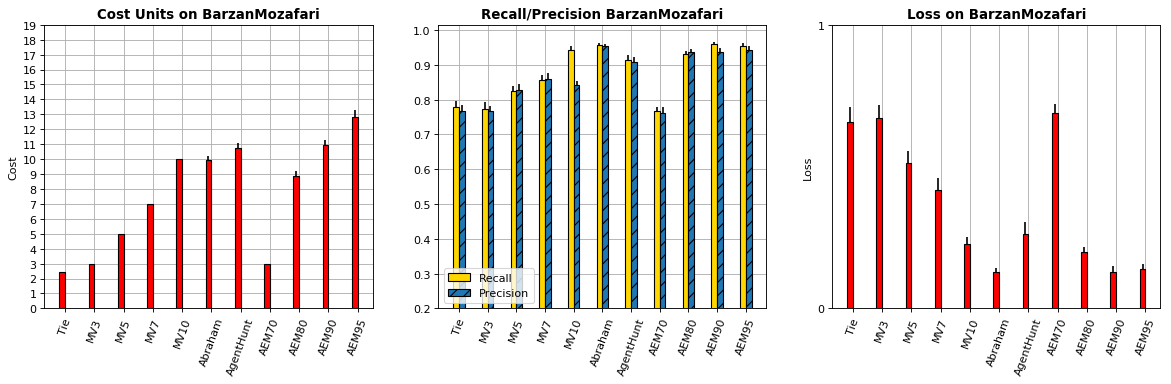

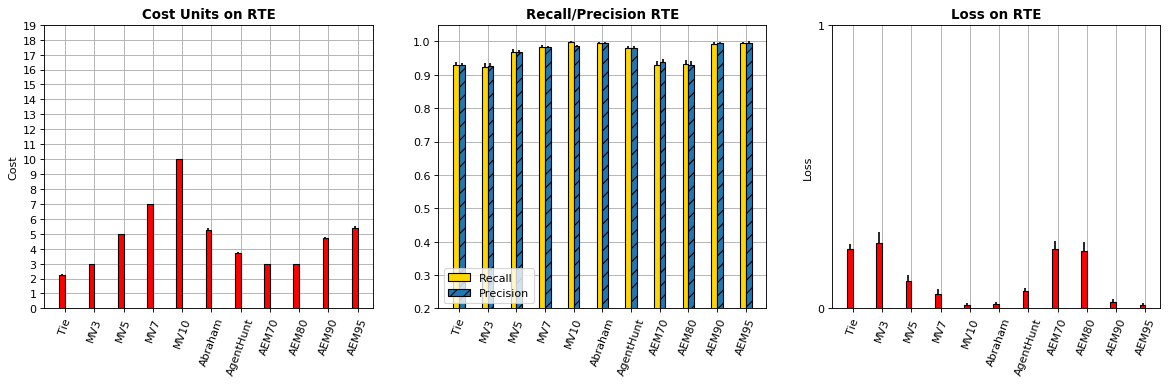

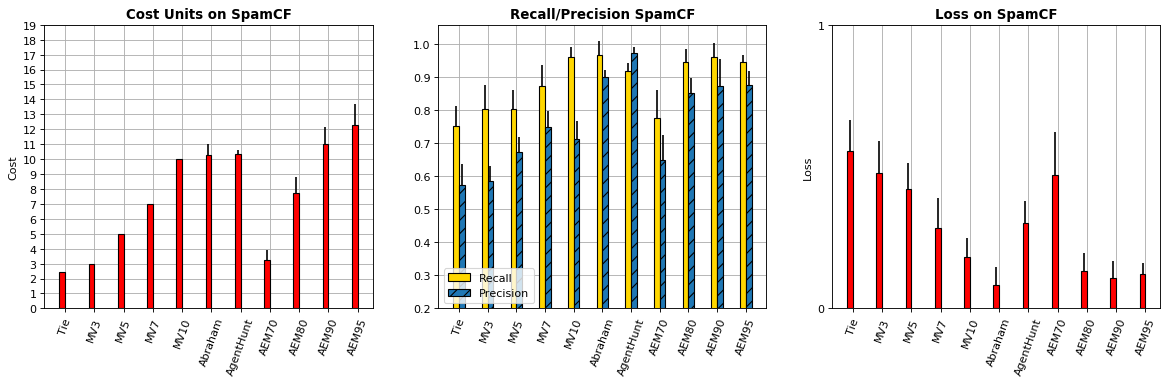

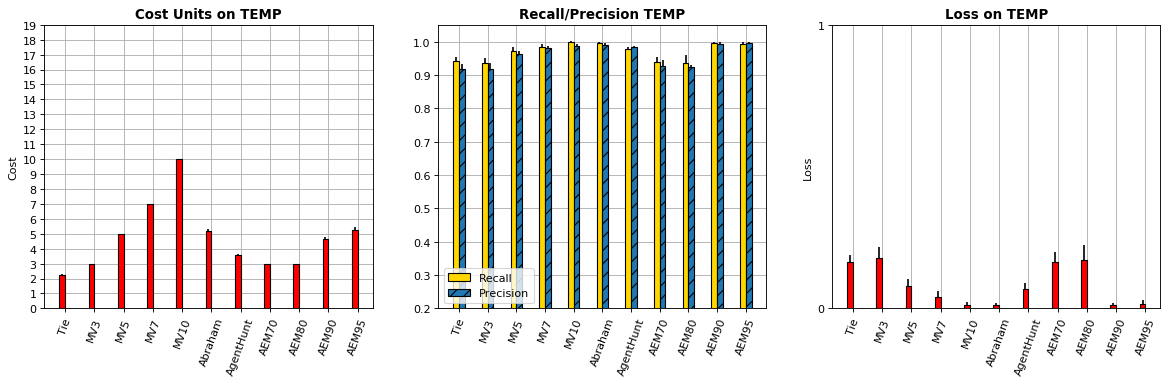

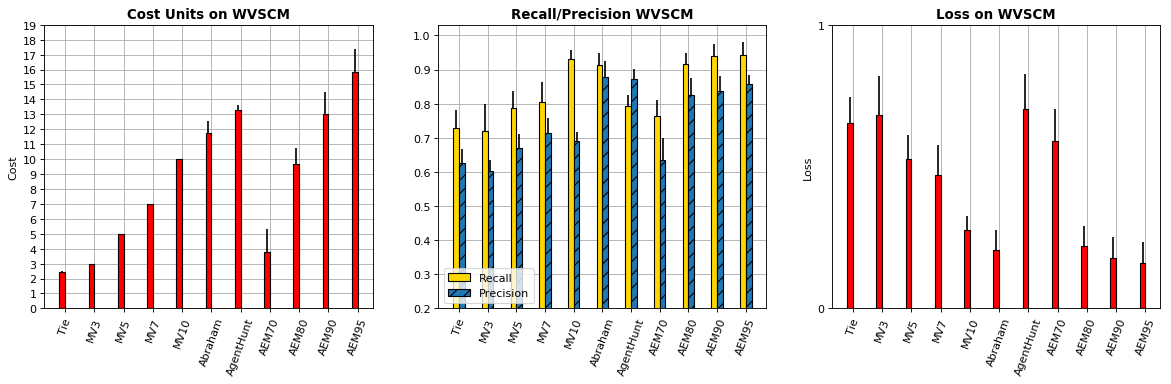

In [8]:
from IPython.core import display as ICD
import helpers.algorithms_utils as alg_utils

data_mv = pd.read_csv('./results/real_world/all_mv.csv')
data_tie = pd.read_csv('./results/real_world/all_break_tie.csv')
data_abraham = pd.read_csv('./results/real_world/all_abraham.csv')
data_agenthunt = pd.read_csv('./results/agenthunt/real_world_results.csv')
adaptive = pd.read_csv('./results/real_world/all_adaptive.csv')


data_bal = 0.5
cr = 0.05

datasets = ['BarzanMozafari', 'RTE', 'SpamCF', 'TEMP', 'WVSCM']

for dataset in datasets:
    
    ground_truth, workers_accuracy = alg_utils.get_real_dataset_data(dataset)
    items_num = len(ground_truth)

    mv = data_mv[data_mv['dataset']==dataset]
    tie = data_tie[data_tie['dataset']==dataset]
    abraham = data_abraham[data_abraham['dataset']==dataset]
    agenthunt = data_agenthunt[data_agenthunt['dataset']==dataset]
    adaptive_mv = adaptive[adaptive['decision_fn']=='decision_function_mv'][adaptive['cost_ratio']==cr][adaptive['dataset']==dataset]
    adaptive_bayes = adaptive[adaptive['class_fn']=='majority_voting'][adaptive['decision_fn']=='decision_function_bayes'][adaptive['cost_ratio']==cr][adaptive['dataset']==dataset]

    datasets_print = [tie, mv, abraham, agenthunt, adaptive_mv, adaptive_bayes]

    items = 11
    ind = np.arange(items)
    width = .2
    xticks_ind = ind + width / 2
    xticks_rotation = 70
    xticks_names = ('Tie', 'MV3', 'MV5', 'MV7', 'MV10', 'Abraham', 'AgentHunt', 'AEM70', 'AEM80', 'AEM90', 'AEM95')


    #Figure 1
    plt.figure(num=1, figsize=(18, 10), dpi=80, facecolor='w', edgecolor='k')
    plt.subplots_adjust(bottom = .1)

    #Balanced dataset
    #1)
    plt.subplot(231)
    cost_mean, cost_std = get_approaches_results(datasets_print, "cost", "cost_std", False, items_num)
    p1 = plt.bar(ind, cost_mean, width, yerr=cost_std, zorder=3, color='red', edgecolor='black')
    plt.ylabel('Cost')
    plt.title(f'Cost Units on {dataset}', fontweight="bold")
    plt.xticks(xticks_ind, xticks_names, rotation=xticks_rotation)
    plt.grid(zorder=0)
    plt.yticks(np.arange(0,20,1))
    plt.savefig("./charts/balanced_data_cost", bbox_inches = 'tight', pad_inches = 0)
    #plt.show()

    #2)
    #plt.figure(num=2, figsize=(18, 10), dpi=80, facecolor='w', edgecolor='k')
    #plt.subplots_adjust(bottom = .05)
    plt.subplot(232)
    precision_mean, precision_std = get_approaches_results(datasets_print, "precision", "precision_std")
    recall_mean, recall_std = get_approaches_results(datasets_print, "recall", "recall_std")
    p1 = plt.bar(ind, recall_mean, width, yerr=recall_std, zorder=3, color='gold', edgecolor='black')
    p2 = plt.bar(ind+width, precision_mean, width, yerr=precision_std, zorder=3, edgecolor='black', hatch="//")
    plt.legend((p1[0], p2[1]), ('Recall', 'Precision'), loc=3)
    plt.title(f'Recall/Precision {dataset}', fontweight="bold")
    plt.xticks(xticks_ind, xticks_names, rotation=xticks_rotation)
    plt.grid(zorder=0)
    plt.yticks(np.arange(0,1.01,.1))
    plt.gca().set_ylim(bottom=0.2)
    plt.savefig("./charts/balanced_data_quality", bbox_inches = 'tight', pad_inches = 0)
    
    #3)
    plt.subplot(233)
    loss_mean, loss_std = get_approaches_results(datasets_print, "loss", "loss_std", False, items_num)
    p1 = plt.bar(ind, loss_mean, width, yerr=loss_std, zorder=3, color='red', edgecolor='black')
    plt.ylabel('Loss')
    plt.title(f'Loss on {dataset}', fontweight="bold")
    plt.xticks(xticks_ind, xticks_names, rotation=xticks_rotation)
    plt.grid(zorder=0)
    plt.yticks(np.arange(0,2,1))
    #plt.savefig("./charts/balanced_data_cost", bbox_inches = 'tight', pad_inches = 0)
    plt.show()

## Summarized Results

In [135]:
#simulated datasets
sm_data_mv = pd.read_csv('./results/simulated_dataset/all_combinations_results_mv.csv')
sm_data_tie = pd.read_csv('./results/simulated_dataset/all_combinations_results_break_tie.csv')
sm_data_abraham = pd.read_csv('./results/abraham/results_cs_es_varied.csv')
sm_data_agenthunt = pd.read_csv('./results/agenthunt/simulated_datasets_results.csv')
sm_adaptive = pd.read_csv('./results/simulated_dataset/all_combinations_results_adaptive.csv')

#real world datasets
rw_data_mv = pd.read_csv('./results/real_world/all_mv.csv')
rw_data_tie = pd.read_csv('./results/real_world/all_break_tie.csv')
rw_data_abraham = pd.read_csv('./results/real_world/all_abraham.csv')
rw_data_agenthunt = pd.read_csv('./results/agenthunt/real_world_results.csv')
rw_adaptive = pd.read_csv('./results/real_world/all_adaptive.csv')

approaches = {'Tie':{}, 'MV3':{}, 'MV5':{}, 'MV7':{}, 'MV10':{}, 'Abraham':{}, 'AgentHunt':{}, 
        'AMV70':{}, 'AMV80':{}, 'AMV90':{}, 'AMV95':{}, 'AEM70':{}, 'AEM80':{}, 'AEM90':{}, 'AEM95':{}}

loss_column = 'loss'
recall_column = 'recall'
precision_column = 'precision'
cost_column = 'cost'

approaches['Tie'][loss_column] = get_total_results(sm_data_tie, rw_data_tie, loss_column)
approaches['Tie'][recall_column] = get_total_results(sm_data_tie, rw_data_tie, recall_column)
approaches['Tie'][precision_column] = get_total_results(sm_data_tie, rw_data_tie, precision_column)
approaches['Tie'][cost_column] = get_total_results(sm_data_tie, rw_data_tie, cost_column)

approaches['MV3'][loss_column] = get_total_results(sm_data_mv, rw_data_mv, loss_column, 3)
approaches['MV3'][recall_column] = get_total_results(sm_data_mv, rw_data_mv, recall_column, 3)
approaches['MV3'][precision_column] = get_total_results(sm_data_mv, rw_data_mv, precision_column, 3)
approaches['MV3'][cost_column] = get_total_results(sm_data_mv, rw_data_mv, cost_column, 3)

approaches['MV5'][loss_column] = get_total_results(sm_data_mv, rw_data_mv, loss_column, 5)
approaches['MV5'][recall_column] = get_total_results(sm_data_mv, rw_data_mv, recall_column, 5)
approaches['MV5'][precision_column] = get_total_results(sm_data_mv, rw_data_mv, precision_column, 5)
approaches['MV5'][cost_column] = get_total_results(sm_data_mv, rw_data_mv, cost_column, 5)

approaches['MV7'][loss_column] = get_total_results(sm_data_mv, rw_data_mv, loss_column, 7)
approaches['MV7'][recall_column] = get_total_results(sm_data_mv, rw_data_mv, recall_column, 7)
approaches['MV7'][precision_column] = get_total_results(sm_data_mv, rw_data_mv, precision_column, 7)
approaches['MV7'][cost_column] = get_total_results(sm_data_mv, rw_data_mv, cost_column, 7)

approaches['MV10'][loss_column] = get_total_results(sm_data_mv, rw_data_mv, loss_column, 10)
approaches['MV10'][recall_column] = get_total_results(sm_data_mv, rw_data_mv, recall_column, 10)
approaches['MV10'][precision_column] = get_total_results(sm_data_mv, rw_data_mv, precision_column, 10)
approaches['MV10'][cost_column] = get_total_results(sm_data_mv, rw_data_mv, cost_column, 10)

abraham_c = 2
abraham_e = 0.2
approaches['Abraham'][loss_column] = get_total_results(sm_data_abraham, rw_data_abraham, loss_column, None, None, None, None, None, abraham_c, abraham_e)
approaches['Abraham'][recall_column] = get_total_results(sm_data_abraham, rw_data_abraham, recall_column, None, None, None, None, None, abraham_c, abraham_e)
approaches['Abraham'][precision_column] = get_total_results(sm_data_abraham, rw_data_abraham, precision_column, None, None, None, None, None, abraham_c, abraham_e)
approaches['Abraham'][cost_column] = get_total_results(sm_data_abraham, rw_data_abraham, cost_column, None, None, None, None, None, abraham_c, abraham_e)

approaches['AgentHunt'][loss_column] = get_total_results(sm_data_agenthunt, rw_data_agenthunt, loss_column)
approaches['AgentHunt'][recall_column] = get_total_results(sm_data_agenthunt, rw_data_agenthunt, recall_column)
approaches['AgentHunt'][precision_column] = get_total_results(sm_data_agenthunt, rw_data_agenthunt, precision_column)
approaches['AgentHunt'][cost_column] = get_total_results(sm_data_agenthunt, rw_data_agenthunt, cost_column)

cost_ratio = 0.05
decision_function_mv = 'decision_function_mv'
threshold = 0.7
approaches['AMV70'][loss_column] = get_total_results(sm_adaptive, rw_adaptive, loss_column, None, cost_ratio, decision_function_mv, threshold, None, None, None)
approaches['AMV70'][recall_column] = get_total_results(sm_adaptive, rw_adaptive, recall_column, None, cost_ratio, decision_function_mv, threshold, None, None, None)
approaches['AMV70'][precision_column] = get_total_results(sm_adaptive, rw_adaptive, precision_column, None, cost_ratio, decision_function_mv, threshold, None, None, None)
approaches['AMV70'][cost_column] = get_total_results(sm_adaptive, rw_adaptive, cost_column, None, cost_ratio, decision_function_mv, threshold, None, None, None)

threshold = 0.8
approaches['AMV80'][loss_column] = get_total_results(sm_adaptive, rw_adaptive, loss_column, None, cost_ratio, decision_function_mv, threshold, None, None, None)
approaches['AMV80'][recall_column] = get_total_results(sm_adaptive, rw_adaptive, recall_column, None, cost_ratio, decision_function_mv, threshold, None, None, None)
approaches['AMV80'][precision_column] = get_total_results(sm_adaptive, rw_adaptive, precision_column, None, cost_ratio, decision_function_mv, threshold, None, None, None)
approaches['AMV80'][cost_column] = get_total_results(sm_adaptive, rw_adaptive, cost_column, None, cost_ratio, decision_function_mv, threshold, None, None, None)

threshold = 0.9
approaches['AMV90'][loss_column] = get_total_results(sm_adaptive, rw_adaptive, loss_column, None, cost_ratio, decision_function_mv, threshold, None, None, None)
approaches['AMV90'][recall_column] = get_total_results(sm_adaptive, rw_adaptive, recall_column, None, cost_ratio, decision_function_mv, threshold, None, None, None)
approaches['AMV90'][precision_column] = get_total_results(sm_adaptive, rw_adaptive, precision_column, None, cost_ratio, decision_function_mv, threshold, None, None, None)
approaches['AMV90'][cost_column] = get_total_results(sm_adaptive, rw_adaptive, cost_column, None, cost_ratio, decision_function_mv, threshold, None, None, None)

threshold = 0.95
approaches['AMV95'][loss_column] = get_total_results(sm_adaptive, rw_adaptive, loss_column, None, cost_ratio, decision_function_mv, threshold, None, None, None)
approaches['AMV95'][recall_column] = get_total_results(sm_adaptive, rw_adaptive, recall_column, None, cost_ratio, decision_function_mv, threshold, None, None, None)
approaches['AMV95'][precision_column] = get_total_results(sm_adaptive, rw_adaptive, precision_column, None, cost_ratio, decision_function_mv, threshold, None, None, None)
approaches['AMV95'][cost_column] = get_total_results(sm_adaptive, rw_adaptive, cost_column, None, cost_ratio, decision_function_mv, threshold, None, None, None)

class_fn = 'majority_voting'
decision_function_mv = 'decision_function_bayes'
threshold = 0.7
approaches['AEM70'][loss_column] = get_total_results(sm_adaptive, rw_adaptive, loss_column, None, cost_ratio, decision_function_mv, threshold, class_fn, None, None)
approaches['AEM70'][recall_column] = get_total_results(sm_adaptive, rw_adaptive, recall_column, None, cost_ratio, decision_function_mv, threshold, class_fn, None, None)
approaches['AEM70'][precision_column] = get_total_results(sm_adaptive, rw_adaptive, precision_column, None, cost_ratio, decision_function_mv, threshold, class_fn, None, None)
approaches['AEM70'][cost_column] = get_total_results(sm_adaptive, rw_adaptive, cost_column, None, cost_ratio, decision_function_mv, threshold, class_fn, None, None)

threshold = 0.8
approaches['AEM80'][loss_column] = get_total_results(sm_adaptive, rw_adaptive, loss_column, None, cost_ratio, decision_function_mv, threshold, class_fn, None, None)
approaches['AEM80'][recall_column] = get_total_results(sm_adaptive, rw_adaptive, recall_column, None, cost_ratio, decision_function_mv, threshold, class_fn, None, None)
approaches['AEM80'][precision_column] = get_total_results(sm_adaptive, rw_adaptive, precision_column, None, cost_ratio, decision_function_mv, threshold, class_fn, None, None)
approaches['AEM80'][cost_column] = get_total_results(sm_adaptive, rw_adaptive, cost_column, None, cost_ratio, decision_function_mv, threshold, class_fn, None, None)

threshold = 0.9
approaches['AEM90'][loss_column] = get_total_results(sm_adaptive, rw_adaptive, loss_column, None, cost_ratio, decision_function_mv, threshold, class_fn, None, None)
approaches['AEM90'][recall_column] = get_total_results(sm_adaptive, rw_adaptive, recall_column, None, cost_ratio, decision_function_mv, threshold, class_fn, None, None)
approaches['AEM90'][precision_column] = get_total_results(sm_adaptive, rw_adaptive, precision_column, None, cost_ratio, decision_function_mv, threshold, class_fn, None, None)
approaches['AEM90'][cost_column] = get_total_results(sm_adaptive, rw_adaptive, cost_column, None, cost_ratio, decision_function_mv, threshold, class_fn, None, None)

threshold = 0.95
approaches['AEM95'][loss_column] = get_total_results(sm_adaptive, rw_adaptive, loss_column, None, cost_ratio, decision_function_mv, threshold, class_fn, None, None)
approaches['AEM95'][recall_column] = get_total_results(sm_adaptive, rw_adaptive, recall_column, None, cost_ratio, decision_function_mv, threshold, class_fn, None, None)
approaches['AEM95'][precision_column] = get_total_results(sm_adaptive, rw_adaptive, precision_column, None, cost_ratio, decision_function_mv, threshold, class_fn, None, None)
approaches['AEM95'][cost_column] = get_total_results(sm_adaptive, rw_adaptive, cost_column, None, cost_ratio, decision_function_mv, threshold, class_fn, None, None)


pd.DataFrame({
    'Approach': list(approaches.keys()),
    'Cost': [round(np.mean(approach[cost_column]), 3) for key, approach in approaches.items()],
    'Loss': [round(np.mean(approach[loss_column]), 3) for key, approach in approaches.items()],
    'Recall': [round(np.mean(approach[recall_column]), 3) for key, approach in approaches.items()],
    'Precision': [round(np.mean(approach[precision_column]), 3) for key, approach in approaches.items()]
})

,Approach,Cost,Loss,Recall,Precision
0,Tie,81.614,0.409,0.833,0.717
1,MV3,103.556,0.410,0.836,0.715
2,MV5,172.594,0.289,0.881,0.786
3,MV7,241.631,0.216,0.911,0.833
4,MV10,345.188,0.120,0.971,0.821
5,Abraham,264.947,0.065,0.971,0.910
6,AgentHunt,270.697,0.237,0.933,0.960
7,AMV70,216.297,0.244,0.902,0.787
8,AMV80,279.725,0.241,0.914,0.749
9,AMV90,228.253,0.307,0.904,0.662
